In [25]:
import pandas as pd

file_path = "C:/Users/Mateo/Desktop/UNAD/SEMESTRE II/ANÁLISIS DE DATOS/Tarea 3/Anexo 2 - Dataset Vehicle/car data.csv"  # Reemplaza esto con la ruta de tu archivo
data = pd.read_csv(file_path)

print("Primeras filas del dataset:")
print(data.head())

print("\nInformación del dataset:")
print(data.info())

print("\nValores nulos por columna:")
print(data.isnull().sum())

print("\nResumen estadístico:")
print(data.describe())

print("\nValores únicos por columna categórica:")
for col in ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']:
    print(f"{col}: {data[col].unique()}")


Primeras filas del dataset:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Pric

In [27]:
from sklearn.preprocessing import StandardScaler

data = pd.get_dummies(data, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

features = ['Year', 'Present_Price', 'Kms_Driven', 'Owner']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

print("Dataset después de la codificación y normalización:")
print(data.head())

Dataset después de la codificación y normalización:
  Car_Name      Year  Selling_Price  Present_Price  Kms_Driven     Owner  \
0     ritz  0.128897           3.35      -0.236215   -0.256224 -0.174501   
1      sx4 -0.217514           4.75       0.221505    0.155911 -0.174501   
2     ciaz  1.168129           7.25       0.257427   -0.773969 -0.174501   
3  wagon r -0.910335           2.85      -0.403079   -0.817758 -0.174501   
4    swift  0.128897           4.60      -0.087890    0.141743 -0.174501   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0             False              True                   False   
1              True             False                   False   
2             False              True                   False   
3             False              True                   False   
4              True             False                   False   

   Transmission_Manual  
0                 True  
1                 True  
2                 True  


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop(['Selling_Price', 'Car_Name'], axis=1)
y = data['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("R-cuadrado (R2):", r2)


Error cuadrático medio (MSE): 3.478803970637902
R-cuadrado (R2): 0.8489813024899067


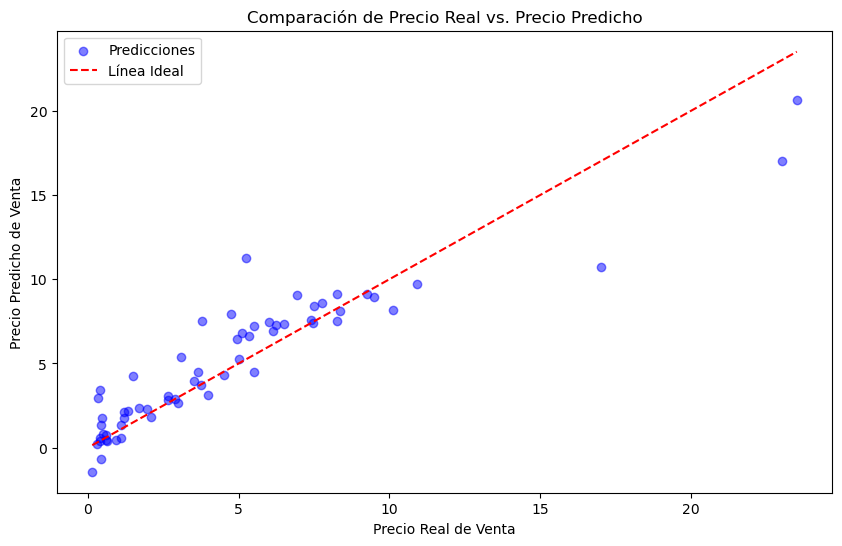

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b', label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Línea Ideal")  
plt.xlabel("Precio Real de Venta")
plt.ylabel("Precio Predicho de Venta")
plt.title("Comparación de Precio Real vs. Precio Predicho")
plt.legend()
plt.show()